In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import sys, os
sys.path.insert(0, "/home/gstupp/projects/WikidataIntegrator")
from wikidataintegrator import wdi_core, wdi_helpers
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [3]:
prop_df = pd.read_csv("prop_count.csv", index_col=0)
prop_df.fillna(0, inplace=True)
prop_df = prop_df.astype(int)
prop_df.head()

,unique,total,organic,robotic,"robotic,organic",organic__total,robotic__total,"robotic,organic__total",-,Apache-HttpClient,Apache-Jena-ARQ,Asparagus/Asparagus 0.1,BeeMusic.Importer (https://beemusic.kantarmedia.fr/; *),C++ WikiAPI,GuzzleHttp,Jakarta Commons-HttpClient/3.1,Java/1.6.0,Java/1.7.0,Java/1.8.0,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),Magnus labs tools,Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/),MediaWiki/1.30.0-wmf.*,MovieGuide-wikidata/0.1,PBB_core fastrun,PetScan,Python-httplib2,Python-urllib,Pywikibot/3.0-dev,QueryBot/0.1,Ruby,SQID Python Helper,WikidataR - https://github.com/Ironholds/WikidataR,YTCleaner,__find_genus,__match_or_create_species,__match_taxon,automatch,auxiliary_matcher,awarder,axios,beaTunes,beacon,bot_commons,botanists,browser,coords2json,curl,fix_items,https://github.com/bearloga/WikidataQueryServiceR,...,PetScan__total,Python-httplib2__total,Python-urllib__total,Pywikibot/3.0-dev__total,QueryBot/0.1__total,Ruby__total,SQID Python Helper__total,WikidataR - https://github.com/Ironholds/WikidataR__total,YTCleaner__total,__find_genus__total,__match_or_create_species__total,__match_taxon__total,automatch__total,auxiliary_matcher__total,awarder__total,axios__total,beaTunes__total,beacon__total,bot_commons__total,botanists__total,browser__total,coords2json__total,curl__total,fix_items__total,https://github.com/bearloga/WikidataQueryServiceR__total,images_on_wikidata_not_wikipedia__total,jgonsior-tree__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,microsync__total,misc__total,missing_wp_animal_audio__total,new_resolve_authors__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,okhttp/3.4.1__total,orcid_bot__total,orcidator__total,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,other__total,python-requests__total,query__total,resolver__total,rest-client2.0.* (*) ruby/*__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,taxon_matcher__total,testing__total,thorough_name_match__total,translate_items_with_property__total,update_dynamic__total,wd_edit_stats__total,wdq_image_feed__total
P698,14939845,15752202,515,14939322,8,3103,15703193,45906,7,0,78,0,0,12,0,0,0,0,0,0,199,0,3678,0,14933216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,523,0,0,99,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49009,0,0,99,28,0,0,0,0,0,0,0,0,0,0,0,0,10,692,0,0,0,30861,0,0,0,0,0,0,0
P932,7681907,10052851,58,7681848,1,150,10052511,190,7,0,74,0,0,10,0,0,0,0,0,0,179,0,1600,0,7677869,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,0,0,2099,0,...,251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,340,0,0,2110,0,0,0,0,0,0,0,0,0,0,0,0,0,11,682,0,7,0,2,0,0,0,0,0,0,0
P31,5372473,21619474,124368,5243926,4179,288786,20053361,1277327,785474,31095,158908,1261,0,8,7530,62042,0,402,27848,0,8627,0,0,0,88159,16704,1,29228,196660,105520,21318,2,0,0,0,0,0,0,0,1,2,43919,0,2,0,418465,0,121,0,86,...,44632,296,1677430,1912254,239706,24520,3715,0,0,0,0,0,0,0,8,24,185891,0,167,0,4776987,0,3782,0,4652,130480,0,89282,0,0,45,11450,114157,17663,3311,0,324008,80457,5614880,716,0,20471,4295996,208670,822,0,6,2353,824,3
P279,3714982,15840791,51449,3660835,2698,112441,15422687,305663,117715,1655,10289,0,0,1,0,97,0,1563,23196,0,1226,0,13629,0,114167,331,0,10541,158831,105517,30748,0,0,0,0,0,0,19,0,1,0,22542,0,0,0,465391,0,76,0,63,...,1718,0,203038,286998,239473,34382,0,0,0,0,0,0,566,0,8,0,111156,0,0,0,3004434,0,619,0,4192,0,1640,88206,0,0,0,0,228154,1348,0,0,324008,38507,4494721,178,1,2328,4116242,104045,0,0,0,1011,0,3
P625,1237332,7305262,35464,1201069,799,213065,7063722,28475,69185,11,137540,0,0,0,0,1169,0,778520,1348,0,1737,0,82324,0,0,104,0,2207,26,0,4,0,952,0,0,0,0,0,3459,0,0,0,0,0,0,131362,27,9,0,68,...,598,0,6742,5756,0,146,0,19041,0,0,0,0,0,2201348,0,0,0,0,0,0,1302712,172,77,0,3372,0,0,17156,0,0,0,0,0,0,0,0,1420,9539,615196,135,0,0,40856,0,0,0,0,0,1,0


### Column Definitions
`unique: number of unique queries that contain this ID
total: number of total queries that contain this ID
organic/robotic/robotic,organic: unique queries classified using the organic/robotic from the original file
xxx___total: total counts (not unique counts)
other columns: unique counts by useragent
other columns__total: total counts by useragent`

In [4]:
#prop_df['nonPBB'] = prop_df['unique'] - prop_df['PBB_core fastrun']
#prop_df['nonPBB__total'] = prop_df['total'] - prop_df['PBB_core fastrun__total']

In [5]:
# columns I care about first
vc = ['unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total',
      'PBB_core fastrun',]
      # 'PBB_core fastrun__total', 'nonPBB', 'nonPBB__total']
cols = list(set(prop_df.columns) - set(vc))
prop_df = prop_df[vc + cols]
prop_df.head()

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,Java/1.7.0,Pywikibot/3.0-dev__total,Asparagus/Asparagus 0.1,jgonsior-tree,__match_taxon,images_on_wikidata_not_wikipedia__total,C++ WikiAPI,botanists__total,okhttp/3.4.1__total,axios__total,testing,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,browser__total,microsync,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,Ruby,__find_genus,orcid_bot,Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/),other__total,Java/1.7.0__total,Jakarta Commons-HttpClient/3.1,orcidator,resolver__total,__match_taxon__total,Apache-Jena-ARQ,other,Python-httplib2__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper),MovieGuide-wikidata/0.1__total,fix_items,python-requests__total,bot_commons,auxiliary_matcher,okhttp/3.4.1,wd_edit_stats__total,automatch,Pywikibot/3.0-dev,-,BeeMusic.Importer (https://beemusic.kantarmedia.fr/; *),QueryBot/0.1,beacon__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,...,resolver,beaTunes__total,update_dynamic__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),misc,misc__total,botanists,testing__total,PetScan,thorough_name_match__total,python-requests,taxon_matcher,PetScan__total,"robotic,organic__total",auxiliary_matcher__total,YTCleaner,C++ WikiAPI__total,Java/1.6.0__total,Python-urllib__total,SQID Python Helper,YTCleaner__total,MediaWiki/1.30.0-wmf.*,query__total,https://github.com/bearloga/WikidataQueryServiceR__total,MediaWiki/1.30.0-wmf.*__total,query,Java/1.6.0,new_resolve_authors__total,Jakarta Commons-HttpClient/3.1__total,Magnus labs tools,Java/1.8.0__total,Python-httplib2,wd_edit_stats,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),beacon,Java/1.8.0,__match_or_create_species,coords2json,BeeMusic.Importer (https://beemusic.kantarmedia.fr/; *)__total,orcidator__total,translate_items_with_property__total,"robotic,organic",osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),jgonsior-tree__total,taxon_matcher__total,update_dynamic,awarder,-__total,missing_wp_animal_audio
P698,14939845,15752202,515,3103,14939322,15703193,14933216,0,0,0,0,0,0,12,0,0,0,0,0,49009,0,0,0,0,0,0,10,0,0,0,0,0,78,2,0,2033,0,99,692,0,0,0,0,0,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,4,0,0,45906,0,0,120,0,0,0,0,3678,0,28,4964,0,0,0,0,199,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,7,0
P932,7681907,10052851,58,150,7681848,10052511,7677869,0,0,0,0,0,0,10,0,0,0,0,0,340,0,0,0,0,0,0,11,0,0,0,7,0,74,2,0,2,0,2099,682,0,0,0,0,0,0,7,0,0,0,0,...,6,0,0,0,0,0,0,0,0,1,0,2,0,251,190,0,0,1204,0,0,0,0,1600,0,0,2070,0,0,0,0,179,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,0
P31,5372473,21619474,124368,288786,5243926,20053361,88159,402,1912254,1261,0,0,130480,8,0,17663,24,5,0,4776987,0,89282,21318,0,13,0,80457,1380,62042,0,0,0,158908,9622,296,1705984,0,0,5614880,2,0,3230,824,0,196660,785474,0,105520,0,114157,...,0,185891,2353,10552,7584,0,0,0,822,16704,0,1314288,1108,44632,1277327,0,0,323,0,1677430,2,0,0,716,4652,0,260,0,11450,174722,8627,498535,1,10,0,0,27848,0,0,0,0,6,4179,196322,0,208670,7,1,2312978,3
P279,3714982,15840791,51449,112441,3660835,15422687,114167,1563,286998,0,10,0,0,1,0,1348,0,0,0,3004434,0,88206,30748,0,0,0,38507,5512,97,0,1,0,10289,10887,0,1644043,0,0,4494721,0,0,1125,0,19,158831,117715,0,105517,0,228154,...,1,111156,1011,21100,7499,0,0,0,0,331,0,756168,540,1718,305663,0,0,44,0,203038,0,0,13629,178,4192,851438,52,0,0,1180,1226,640772,0,0,0,0,23196,0,0,0,0,0,2698,196322,1640,104045,3,1,516525,0
P625,1237332,7305262,35464,213065,1201069,7063722,0,778520,5756,0,0,0,0,0,0,0,0,0,0,1302712,0,17156,4,0,0,0,9539,1818522,1169,0,0,0,137540,3840,0,14298,0,0,615196,0,3459,0,1,0,26,69185,0,0,0,0,...,0,0,0,0,2675,0,0,0,0,104,0,6299,0,598,28475,2201348,0,0,0,6742,0,0,82324,135,3372,134508,68,0,0,22782,1737,4098,0,1,0,0,1348,0,27,0,0,0,799,594,0,0,0,0,313574,0


In [6]:
query = """
SELECT ?prop ?propLabel WHERE {
?prop wikibase:propertyType ?pt .
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}"""
prop_label_df = wdi_core.WDItemEngine.execute_sparql_query(query, as_dataframe=True)
prop_label_df.prop = prop_label_df.prop.str.replace("http://www.wikidata.org/entity/", "")
prop_label = dict(zip(prop_label_df.prop, prop_label_df.propLabel))

In [7]:
prop_df.index = prop_df.index.map(prop_label.get)
prop_df = prop_df.iloc[prop_df.index.notnull(),:]
prop_df.to_csv("prop_count_labels.csv")
prop_df.head(5)

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,Java/1.7.0,Pywikibot/3.0-dev__total,Asparagus/Asparagus 0.1,jgonsior-tree,__match_taxon,images_on_wikidata_not_wikipedia__total,C++ WikiAPI,botanists__total,okhttp/3.4.1__total,axios__total,testing,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,browser__total,microsync,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,Ruby,__find_genus,orcid_bot,Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/),other__total,Java/1.7.0__total,Jakarta Commons-HttpClient/3.1,orcidator,resolver__total,__match_taxon__total,Apache-Jena-ARQ,other,Python-httplib2__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper),MovieGuide-wikidata/0.1__total,fix_items,python-requests__total,bot_commons,auxiliary_matcher,okhttp/3.4.1,wd_edit_stats__total,automatch,Pywikibot/3.0-dev,-,BeeMusic.Importer (https://beemusic.kantarmedia.fr/; *),QueryBot/0.1,beacon__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,...,resolver,beaTunes__total,update_dynamic__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),misc,misc__total,botanists,testing__total,PetScan,thorough_name_match__total,python-requests,taxon_matcher,PetScan__total,"robotic,organic__total",auxiliary_matcher__total,YTCleaner,C++ WikiAPI__total,Java/1.6.0__total,Python-urllib__total,SQID Python Helper,YTCleaner__total,MediaWiki/1.30.0-wmf.*,query__total,https://github.com/bearloga/WikidataQueryServiceR__total,MediaWiki/1.30.0-wmf.*__total,query,Java/1.6.0,new_resolve_authors__total,Jakarta Commons-HttpClient/3.1__total,Magnus labs tools,Java/1.8.0__total,Python-httplib2,wd_edit_stats,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),beacon,Java/1.8.0,__match_or_create_species,coords2json,BeeMusic.Importer (https://beemusic.kantarmedia.fr/; *)__total,orcidator__total,translate_items_with_property__total,"robotic,organic",osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),jgonsior-tree__total,taxon_matcher__total,update_dynamic,awarder,-__total,missing_wp_animal_audio
PubMed ID,14939845,15752202,515,3103,14939322,15703193,14933216,0,0,0,0,0,0,12,0,0,0,0,0,49009,0,0,0,0,0,0,10,0,0,0,0,0,78,2,0,2033,0,99,692,0,0,0,0,0,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,4,0,0,45906,0,0,120,0,0,0,0,3678,0,28,4964,0,0,0,0,199,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,7,0
PMCID,7681907,10052851,58,150,7681848,10052511,7677869,0,0,0,0,0,0,10,0,0,0,0,0,340,0,0,0,0,0,0,11,0,0,0,7,0,74,2,0,2,0,2099,682,0,0,0,0,0,0,7,0,0,0,0,...,6,0,0,0,0,0,0,0,0,1,0,2,0,251,190,0,0,1204,0,0,0,0,1600,0,0,2070,0,0,0,0,179,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,0
instance of,5372473,21619474,124368,288786,5243926,20053361,88159,402,1912254,1261,0,0,130480,8,0,17663,24,5,0,4776987,0,89282,21318,0,13,0,80457,1380,62042,0,0,0,158908,9622,296,1705984,0,0,5614880,2,0,3230,824,0,196660,785474,0,105520,0,114157,...,0,185891,2353,10552,7584,0,0,0,822,16704,0,1314288,1108,44632,1277327,0,0,323,0,1677430,2,0,0,716,4652,0,260,0,11450,174722,8627,498535,1,10,0,0,27848,0,0,0,0,6,4179,196322,0,208670,7,1,2312978,3
subclass of,3714982,15840791,51449,112441,3660835,15422687,114167,1563,286998,0,10,0,0,1,0,1348,0,0,0,3004434,0,88206,30748,0,0,0,38507,5512,97,0,1,0,10289,10887,0,1644043,0,0,4494721,0,0,1125,0,19,158831,117715,0,105517,0,228154,...,1,111156,1011,21100,7499,0,0,0,0,331,0,756168,540,1718,305663,0,0,44,0,203038,0,0,13629,178,4192,851438,52,0,0,1180,1226,640772,0,0,0,0,23196,0,0,0,0,0,2698,196322,1640,104045,3,1,516525,0
coordinate location,1237332,7305262,35464,213065,1201069,7063722,0,778520,5756,0,0,0,0,0,0,0,0,0,0,1302712,0,17156,4,0,0,0,9539,1818522,1169,0,0,0,137540,3840,0,14298,0,0,615196,0,3459,0,1,0,26,69185,0,0,0,0,...,0,0,0,0,2675,0,0,0,0,104,0,6299,0,598,28475,2201348,0,0,0,6742,0,0,82324,135,3372,134508,68,0,0,22782,1737,4098,0,1,0,0,1348,0,27,0,0,0,799,594,0,0,0,0,313574,0


In [9]:
## Make plots

In [10]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


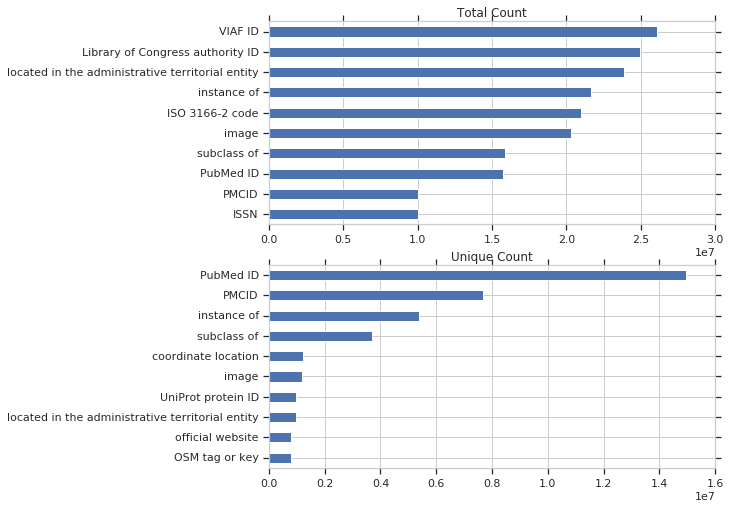

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
df = prop_df.sort_values("total")[-10:]
df[['total']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = prop_df.sort_values("unique")[-10:]
df[['unique']].plot.barh(ax=ax2, legend=False)
ax.set_title("Total Count")
ax2.set_title("Unique Count")

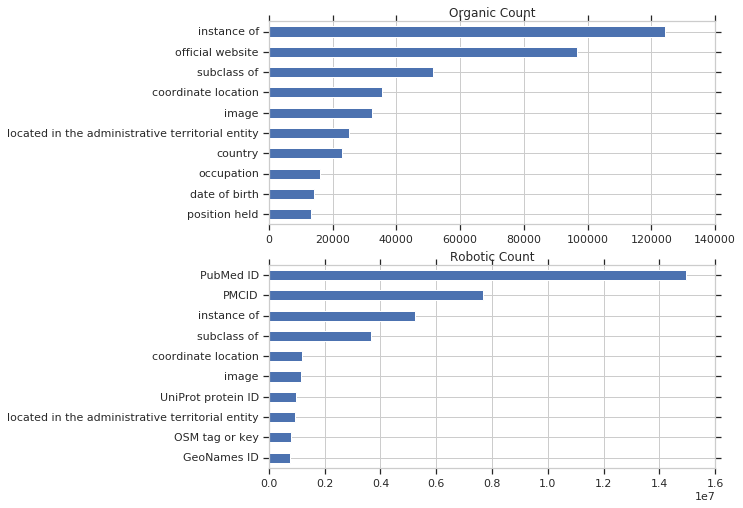

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
df = prop_df.sort_values("organic")[-10:]
df[['organic']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = prop_df.sort_values("robotic")[-10:]
df[['robotic']].plot.barh(ax=ax2, legend=False)
ax.set_title("Organic Count")
ax2.set_title("Robotic Count")

In [13]:
ua_cols = set(prop_df.columns)-{'unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total', 'robotic,organic__total', 'robotic,organic', 'label'}

In [14]:
# most active useragents
ua_prop_df = prop_df.loc[:,ua_cols]
ua_prop_df_total = ua_prop_df[ua_prop_df.columns[ua_prop_df.columns.str.contains("__total")]]
ua_prop_df_total.columns = ua_prop_df_total.columns.str.replace("__total", "")
ua_prop_df_unique = ua_prop_df[ua_prop_df.columns[~ua_prop_df.columns.str.contains("__total")]]

top_ua = set(ua_prop_df_unique.sum().sort_values()[-15:].index) | set(ua_prop_df_total.sum().sort_values()[-15:].index)
df = pd.DataFrame([ua_prop_df_unique.sum(), ua_prop_df_total.sum()]).T
df = df.reindex(top_ua)
df = df.rename(columns={0: "Unique", 1: "Total"})
df.head()

,Unique,Total
Java/1.7.0,3431099,7824555
sparqlwrapper * (rdflib.github.io/sparqlwrapper),6689129,15114801
browser,2426747,29324715
python-requests,5365494,35747013
GuzzleHttp,73326,15674035


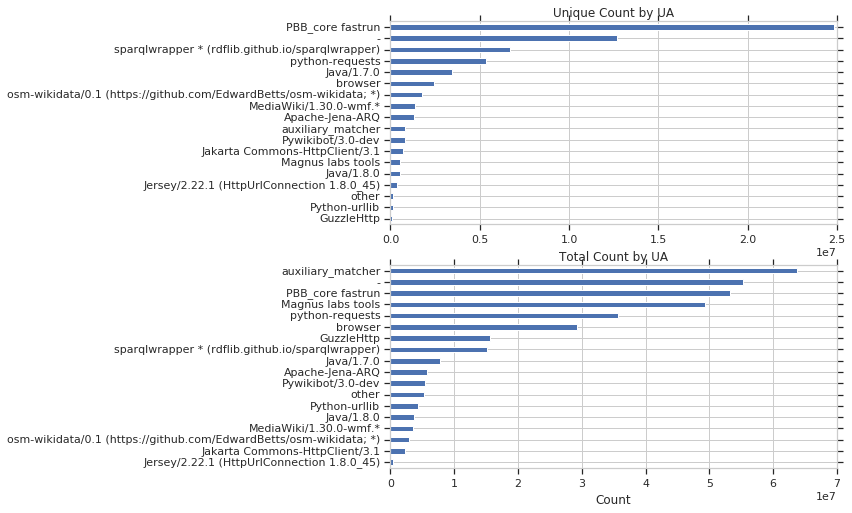

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
df[['Unique']].sort_values('Unique').plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df[['Total']].sort_values('Total').plot.barh(ax=ax2, legend=False)
ax.set_title("Unique Count by UA")
ax2.set_title("Total Count by UA")
ax2.set_xlabel("Count")

In [17]:
# most used props by useragents
ua_prop_df = prop_df.loc[:,ua_cols].apply(lambda x:np.log10(x+1))
ua_prop_df_total = ua_prop_df[ua_prop_df.columns[ua_prop_df.columns.str.contains("__total")]]
ua_prop_df_unique = ua_prop_df[ua_prop_df.columns[~ua_prop_df.columns.str.contains("__total")]]

top_props = set(ua_prop_df_total.sum(axis=1).sort_values(ascending=False)[:10].index) | set(ua_prop_df_unique.sum(axis=1).sort_values(ascending=False)[:10].index)
ua_prop_df_total = ua_prop_df_total[ua_prop_df_total.index.isin(top_props)]
ua_prop_df_unique = ua_prop_df_unique[ua_prop_df_unique.index.isin(top_props)]

top_uas_total = ua_prop_df_total.sum(axis=0).sort_values(ascending=False)[:9].index
top_uas_unique = ua_prop_df_unique.sum(axis=0).sort_values(ascending=False)[:9].index
ua_prop_df_total = ua_prop_df_total.loc[:, top_uas_total]
ua_prop_df_unique = ua_prop_df_unique.loc[:, top_uas_unique]

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


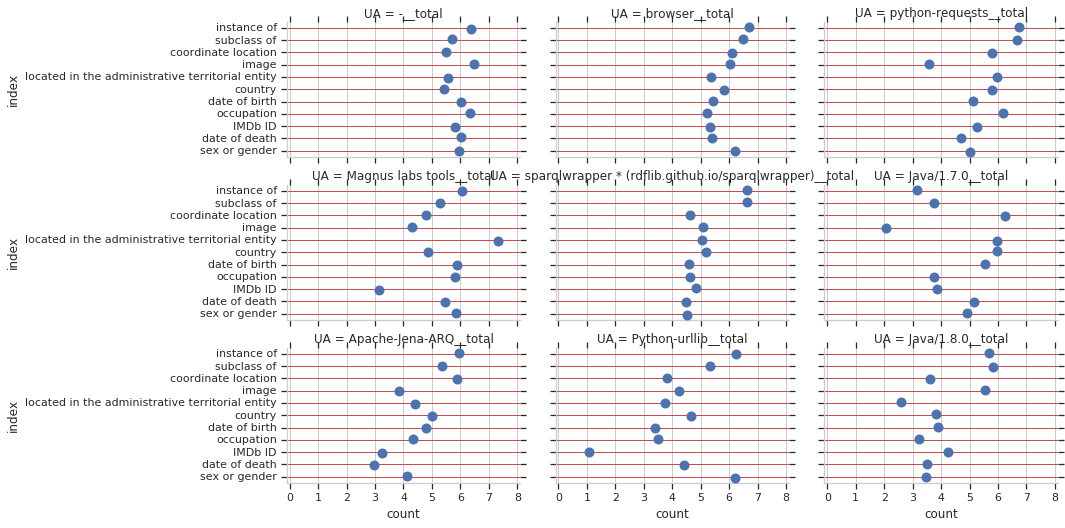

In [18]:
m = ua_prop_df_total.reset_index().melt(id_vars="index")
m['UA'] = m['variable']
m['count'] = m['value']
g = sns.FacetGrid(m, col="UA", col_wrap=3, height=2.5, aspect=2)
g.map(sns.stripplot, "count", "index", size=10)
g.set(xlim=(-0.1, 8.1))
for ax in g.axes:
    ax.grid(color='r', linestyle='-', linewidth=1, axis='y')

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


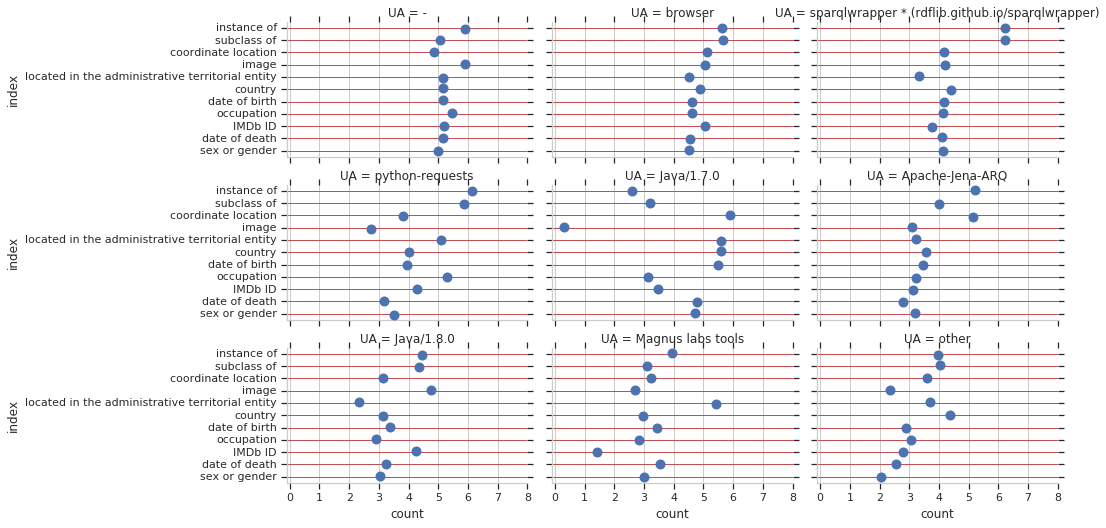

In [19]:
m = ua_prop_df_unique.reset_index().melt(id_vars="index")
m['UA'] = m['variable']
m['count'] = m['value']
g = sns.FacetGrid(m, col="UA", col_wrap=3, height=2.5, aspect=2)
g.map(sns.stripplot, "count", "index", size=10)
g.set(xlim=(-0.1, 8))
for ax in g.axes:
    ax.grid(color='r', linestyle='-', linewidth=1, axis='y')

In [23]:
### explore some queries: Pubmed ID
!zcat data/2017-678_uniq.tsv.gz | python3 look_for_queries.py P698 | head -n100

2838649it [00:53, 53208.57it/s]Describe	 <http://www.wikidata.org/entity/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
Describe	 <http://www.wikidata.org/prop/reference/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
Describe	 <http://www.wikidata.org/prop/statement/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P698> / <http://www.wikidata.org/prop/statement/P698> ) "10000001".	}	 robotic PBB_core fastrun 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P698> / <http://www.wikidata.org/prop/statement/P698> ) "1000000".	}	 robotic PBB_core fastrun 2
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P698> / <http://www.wikidata.org/prop/statement/P698> ) "10000002".	}	 robotic PBB_core fastrun 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P698> / <http://www.wikidata.org/prop/statement/P698> ) "10000003".	}	 robotic PBB_core fastrun 1
SELECT *	W


gzip: stdout: Broken pipe


In [24]:
### explore some queries: Pubmed ID without pbb
!zcat data/2017-678_uniq.tsv.gz | python3 look_for_queries.py P698 | grep -v "PBB_core" | head -n100

18771806it [04:35, 68038.71it/s]Describe	 <http://www.wikidata.org/entity/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
Describe	 <http://www.wikidata.org/prop/reference/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
Describe	 <http://www.wikidata.org/prop/statement/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
SELECT *	WHERE {	  ?var1  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  <http://www.wikidata.org/prop/novalue/P698> .	 FILTER (  ( !( CONTAINS (  STR (  ?var1  ) , "statement" ) ) ) 	) .	 FILTER (  ( !( CONTAINS (  STR (  ?var1  ) , "reference" ) ) ) 	) .	}	 robotic Apache-Jena-ARQ 1
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P2410>  ?var2 ;	 <http://www.wikidata.org/prop/direct/P2860>  ?var3 .	  ?var4  <http://www.wikidata.org/prop/direct/P3937>  ?var5 ;	 <http://www.wikidata.org/prop/direct/P2860>  ?var3 .	  ?var3  <http://www.wikidata.org/prop/direct/P698>  ?var6 .	}	 organic browser 1
SELECT 


gzip: stdout: Broken pipe


In [25]:
### explore some queries: Disease ontology ID
!zcat data/2017-678_uniq.tsv.gz | python3 look_for_queries.py P699 | head -n100

7694706it [02:01, 63176.21it/s]Describe	 <http://www.wikidata.org/entity/P699>  robotic Apache-Jena-ARQ 1
SELECT *	WHERE {	  <http://www.wikidata.org/entity/P699>  <http://www.wikidata.org/prop/P486>  ?var1 .	}	 organic browser 1
SELECT *	WHERE {	  <http://www.wikidata.org/prop/direct/P699>  ?var1  ?var2 .	}	 organic browser 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P699> / <http://www.wikidata.org/prop/statement/P699> ) "DOID:10003".	}	 robotic PBB_core fastrun 3
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P699> / <http://www.wikidata.org/prop/statement/P699> ) "DOID:10016".	}	 robotic PBB_core fastrun 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P699> / <http://www.wikidata.org/prop/statement/P699> ) "DOID:10017".	}	 robotic PBB_core fastrun 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P699> / <http://www.wikidata.org/prop/statement/P699> ) "DOID:10020".	}	 robotic PBB_core fastrun 1
SELECT *	WHERE {	  ?var1 ( <http://www.wiki

Traceback (most recent call last):
  File "look_for_queries.py", line 20, in <module>
    print(query, sourceCategory, user_agents, count)
BrokenPipeError: [Errno 32] Broken pipe

gzip: stdout: Broken pipe


In [26]:
### explore some queries: Disease ontology ID without pbb
!zcat data/2017-678_uniq.tsv.gz | python3 look_for_queries.py P699 | grep -v "PBB_core" | head -n100

18772448it [04:11, 74606.51it/s]Describe	 <http://www.wikidata.org/entity/P699>  robotic Apache-Jena-ARQ 1
SELECT *	WHERE {	  <http://www.wikidata.org/entity/P699>  <http://www.wikidata.org/prop/P486>  ?var1 .	}	 organic browser 1
SELECT *	WHERE {	  <http://www.wikidata.org/prop/direct/P699>  ?var1  ?var2 .	}	 organic browser 1
SELECT *	WHERE {	  ?var1  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  <http://www.wikidata.org/prop/novalue/P699> .	 FILTER (  ( !( CONTAINS (  STR (  ?var1  ) , "statement" ) ) ) 	) .	 FILTER (  ( !( CONTAINS (  STR (  ?var1  ) , "reference" ) ) ) 	) .	}	 robotic Apache-Jena-ARQ 1
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P31>  <http://www.wikidata.org/entity/P699> .	}	 organic browser 2
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  "DOID:14566".	}	 organic browser 1
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  "DOID:150".	}	 organic browser 1
SELECT *	WHERE {	  ?var1  <http://www.wiki

20779613it [05:09, 67246.37it/s]r2  )	WHERE {	 SELECT DISTINCT ?var1  ?var3 	 WHERE  {	   ?var1  <http://www.wikidata.org/prop/statement/P699>  ?var3 .	   ?var1  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?var4 .	   ?var3  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?var5 .	 }	}	 robotic Apache-Jena-ARQ 1
SELECT( COUNT ( ?var1  ) AS  ?var2  )	WHERE {	 SELECT DISTINCT ?var1  ?var3 	 WHERE  {	   ?var1  <http://www.wikidata.org/prop/statement/P699>  ?var3 .	   ?var1  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?var4 .	 FILTER (   (  isLITERAL (  ?var3  )  ) 	) .	 }	}	 robotic Apache-Jena-ARQ 1
SELECT( COUNT ( ?var1  ) AS  ?var2  )( COUNT ( DISTINCT  ?var1  ) AS  ?var3  )( COUNT ( DISTINCT  ?var4  ) AS  ?var5  )	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var4 .	}	 robotic Apache-Jena-ARQ 1
SELECT( COUNT ( ?var1  ) AS  ?var2  )( COUNT ( DISTINCT  ?var1  ) AS  ?var3  )( COUNT ( DISTINCT  ?var4  ) AS  ?var5  )	WHERE {	  ?var1  <http://www.wikidata.org/